# CS 210 - Data Science Final Project

## Ismet Huseyin Bingöl - Deniz Erden

In this project, our aims are:
- Select proper dataset
- Investigate and understand this dataset 
- Formulate our hypothesis
- Test this hypothesis
- Build single linear regression model to predict
- Build machine learning model to predict 

Firstly, we have searched datasets via Kaggle, Datahub, Data.gov and UCI Repository. The one of the most interesting and proper one is https://datahub.io/JohnSnowLabs/euro-4-cars-emissions-traded-on-uk-market-2000-2015. This dataset has enough data to build machine learning model to good prediction, ideal number of columns (unique features) to understand correlation between different features

Let me to tell some information about this dataset.

- This dataset has been created by _JohnSnowLabs_ which is a US based Healtcare AI company.
- This dataset include some feature from different car models which has been traded on the UK market between 2000 and 2015. We will give more information about the dataset with next sections. 


Now, that's time for the investigate dataset. For this, firstly we need _import libraries_.

In [1]:
# Let's import required libraries.

import pandas as pd
import os
import seaborn as sns
import scipy.stats as sp
import numpy as np
from sklearn import datasets, linear_model, tree
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_format = 'retina' # If you have retina screen, use this
                                               # command to better graphics

In [2]:
# List files in this directory

os.listdir() 

['.DS_Store',
 'datapackage.json',
 'euro-4-cars-emissions-traded-on-uk-market-2000-2015_zip',
 'data.csv',
 'Euro_Car_Emissions.ipynb',
 '.ipynb_checkpoints',
 'data',
 'euro-4-cars-emissions-traded-on-uk-market-2000-2015_zip.zip',
 'notebook.tex']

We need to import _csv_ file to panda dataset to explore it!

In [3]:
# Necessary csv file is 'data.csv'

euro_4_data = pd.read_csv('data.csv')

Now, we can investigate dataset with some function of pandas libraries. Firstly, we can look the top of the dataset.

In [4]:
# Look at the first 10 column

euro_4_data.head(10) 

,Years_Released,Car_Manufacturer,Car_Model,Car_Description,Car_Transmission_Type,Car_Engine_Capacity_In_Cubic_Centimeters,Car_Fuel_Type,Urban_Fuel_Consumption_In_Metric_Units,Extra_Urban_Fuel_Consumption_In_Metric_Units,Combined_Fuel_Consumption_In_Metric_Units,...,Maximum_Range_Miles,Electricity_Cost,Total_Cost,Level_Of_External_Noise_Emitted_In_Decibels,CO2_Emissions_In_Grams_Per_Km,CO_Emmisions_In_Milligrams_Per_Km,THC_Emissions_In_Milligrams_Per_Km,NOx_Emissions_In_Milligrams_Per_Km,THC_And_NOx_Emissions_In_Milligrams_Per_Km,Particulate_Matter_In_Milligrams_Per_Km
0,2012,KIA,Sedona,2.2 CRDi Auto,A4,2199.0,Diesel,10.0,6.2,7.5,...,NaN,NaN,1063.6,72.0,199,0.1,NaN,0.3,0.3,0.0
1,2012,KIA,Sedona,2.2 CRDi Manual,M6,2199.0,Diesel,8.8,5.6,6.7,...,NaN,NaN,950.1,73.0,179,0.1,NaN,0.3,0.3,0.0
2,2012,SSANGYONG,Rexton II,270 CS Auto TOD 165PS 2 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,250,0.2,NaN,0.3,0.3,0.0
3,2012,SSANGYONG,Rexton II,270 CS Manual TOD 165PS 2 Seats,5MT,2696.0,Diesel,11.5,7.5,9.0,...,NaN,NaN,1276.9,74.7,228,0.4,NaN,0.3,0.3,0.0
4,2012,SSANGYONG,Rexton II,270 EX Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,249,0.2,NaN,0.3,0.3,0.0
5,2012,SSANGYONG,Rexton II,270 S Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,250,0.2,NaN,0.3,0.3,0.0
6,2012,SSANGYONG,Rexton II,270 S Manual TOD 165PS 7 Seats,5MT,2696.0,Diesel,11.5,7.5,9.0,...,NaN,NaN,1276.9,74.7,228,0.4,NaN,0.3,0.3,0.0
7,2012,SSANGYONG,Rodius,270 ES Auto 2WD 165PS 7 Seats,5AT,2696.0,Diesel,12.8,7.9,9.7,...,NaN,NaN,1377.9,71.9,247,0.3,NaN,0.3,0.3,0.0
8,2012,SSANGYONG,Rodius,270 ES Manual 2WD 165PS 7 Seats,5MT,2696.0,Diesel,11.2,7.4,8.8,...,NaN,NaN,1249.1,73.9,223,0.4,NaN,0.3,0.3,0.0
9,2012,SSANGYONG,Rodius,270 EX Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,13.0,8.0,9.8,...,NaN,NaN,1392.2,70.5,250,0.4,NaN,0.3,0.3,0.0


We can many features. Let's list these.

In [5]:
print (list(euro_4_data))

['Years_Released', 'Car_Manufacturer', 'Car_Model', 'Car_Description', 'Car_Transmission_Type', 'Car_Engine_Capacity_In_Cubic_Centimeters', 'Car_Fuel_Type', 'Urban_Fuel_Consumption_In_Metric_Units', 'Extra_Urban_Fuel_Consumption_In_Metric_Units', 'Combined_Fuel_Consumption_In_Metric_Units', 'Urban_Fuel_Consumption_In_Imperial_Units', 'Extra_Urban_Fuel_Consumption_In_Imperial_Units', 'Combined_Urban_Fuel_Consumption_In_Imperial_Units', 'Fuel_Cost_Per_6000_Miles', 'Electric_Energy_Consumption_Miles_Per_KWh', 'Wh_Per_Km', 'Maximum_Range_Km', 'Maximum_Range_Miles', 'Electricity_Cost', 'Total_Cost', 'Level_Of_External_Noise_Emitted_In_Decibels', 'CO2_Emissions_In_Grams_Per_Km', 'CO_Emmisions_In_Milligrams_Per_Km', 'THC_Emissions_In_Milligrams_Per_Km', 'NOx_Emissions_In_Milligrams_Per_Km', 'THC_And_NOx_Emissions_In_Milligrams_Per_Km', 'Particulate_Matter_In_Milligrams_Per_Km']


We can see some features has long name. We should change these names to better graphic for the next steps.

In [6]:
# Change the name of some column for better graphic

euro_4_data.rename(columns = {'Urban_Fuel_Consumption_In_Metric_Units':'U_Fuel_Cons(m)',
                              'Extra_Urban_Fuel_Consumption_In_Metric_Units':'EU_Fuel_Cons(m)',
                              'Combined_Fuel_Consumption_In_Metric_Units':'Comb_Fuel_Cons(m)',
                              'Level_Of_External_Noise_Emitted_In_Decibels':'Ext_Noise(dB)',
                              'CO2_Emissions_In_Grams_Per_Km':'CO2_Emission(gr/km)',
                              'CO_Emmisions_In_Milligrams_Per_Km':'CO_Emission(mg/km)'}, inplace = True)

In [7]:
# Look at the first 10 column to check.

euro_4_data.head(10) 

,Years_Released,Car_Manufacturer,Car_Model,Car_Description,Car_Transmission_Type,Car_Engine_Capacity_In_Cubic_Centimeters,Car_Fuel_Type,U_Fuel_Cons(m),EU_Fuel_Cons(m),Comb_Fuel_Cons(m),...,Maximum_Range_Miles,Electricity_Cost,Total_Cost,Ext_Noise(dB),CO2_Emission(gr/km),CO_Emission(mg/km),THC_Emissions_In_Milligrams_Per_Km,NOx_Emissions_In_Milligrams_Per_Km,THC_And_NOx_Emissions_In_Milligrams_Per_Km,Particulate_Matter_In_Milligrams_Per_Km
0,2012,KIA,Sedona,2.2 CRDi Auto,A4,2199.0,Diesel,10.0,6.2,7.5,...,NaN,NaN,1063.6,72.0,199,0.1,NaN,0.3,0.3,0.0
1,2012,KIA,Sedona,2.2 CRDi Manual,M6,2199.0,Diesel,8.8,5.6,6.7,...,NaN,NaN,950.1,73.0,179,0.1,NaN,0.3,0.3,0.0
2,2012,SSANGYONG,Rexton II,270 CS Auto TOD 165PS 2 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,250,0.2,NaN,0.3,0.3,0.0
3,2012,SSANGYONG,Rexton II,270 CS Manual TOD 165PS 2 Seats,5MT,2696.0,Diesel,11.5,7.5,9.0,...,NaN,NaN,1276.9,74.7,228,0.4,NaN,0.3,0.3,0.0
4,2012,SSANGYONG,Rexton II,270 EX Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,249,0.2,NaN,0.3,0.3,0.0
5,2012,SSANGYONG,Rexton II,270 S Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,250,0.2,NaN,0.3,0.3,0.0
6,2012,SSANGYONG,Rexton II,270 S Manual TOD 165PS 7 Seats,5MT,2696.0,Diesel,11.5,7.5,9.0,...,NaN,NaN,1276.9,74.7,228,0.4,NaN,0.3,0.3,0.0
7,2012,SSANGYONG,Rodius,270 ES Auto 2WD 165PS 7 Seats,5AT,2696.0,Diesel,12.8,7.9,9.7,...,NaN,NaN,1377.9,71.9,247,0.3,NaN,0.3,0.3,0.0
8,2012,SSANGYONG,Rodius,270 ES Manual 2WD 165PS 7 Seats,5MT,2696.0,Diesel,11.2,7.4,8.8,...,NaN,NaN,1249.1,73.9,223,0.4,NaN,0.3,0.3,0.0
9,2012,SSANGYONG,Rodius,270 EX Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,13.0,8.0,9.8,...,NaN,NaN,1392.2,70.5,250,0.4,NaN,0.3,0.3,0.0


Let's deeply investigate our features. Firstly, focus to unique values. 

In [8]:
# Let's see unique value of car fuel type

euro_4_data.Car_Fuel_Type.unique()

array(['Diesel', 'Petrol', 'Petrol / E85 (Flex Fuel)', 'Petrol Hybrid',
       'Petrol/E85 (Flex Fuel)', 'Petrol E85 (Flex Fuel)', 'Petrol / E85',
       'Petrol / E85 ', 'Petrol Electric', 'CNG', 'LPG', 'Petrol ',
       'LPG/ Petrol', 'CNG  ', 'Pet Hybrid'], dtype=object)

As you can see, some _unique_ types are not exactly **unique**. So, we will make change to create **real** unique types.

In [9]:
# Lets remove small differences.

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol / E85 (Flex Fuel)', 
                'Car_Fuel_Type'] = 'Petrol-E85'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol/E85 (Flex Fuel)', 
                'Car_Fuel_Type'] = 'Petrol-E85'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol E85 (Flex Fuel)', 
                'Car_Fuel_Type'] = 'Petrol-E85'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol / E85', 
                'Car_Fuel_Type'] = 'Petrol-E85'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol / E85 ', 
                'Car_Fuel_Type'] = 'Petrol-E85'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Pet Hybrid ', 
                'Car_Fuel_Type'] = 'Petrol Hybrid'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Pet Hybrid', 
                'Car_Fuel_Type'] = 'Petrol Hybrid'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'CNG  ', 
                'Car_Fuel_Type'] = 'CNG'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol Hybrid', 
                'Car_Fuel_Type'] = 'Petrol Electric'

euro_4_data.loc[euro_4_data.Car_Fuel_Type == 'Petrol ', 
                'Car_Fuel_Type'] = 'Petrol'

In [10]:
# Check it again.

euro_4_data.Car_Fuel_Type.unique()

array(['Diesel', 'Petrol', 'Petrol-E85', 'Petrol Electric', 'CNG', 'LPG',
       'LPG/ Petrol'], dtype=object)

Now, we have **real** uniquness in _Car Fuel Type_. Now, continue with other features.

In [11]:
print ('Unique values for Car Transmission Type: ', euro_4_data.Car_Transmission_Type.unique())

Unique values for Car Transmission Type:  ['A4' 'M6' '5AT' '5MT' 'M5' 'A5' 'A6' 'ASM  ' 'A5-AWD' 'M6-AWD' 'M6/S6'
 'S6' 'E-CVT' 'A8' 'SAT6' '6MT' 'CVT' 'AT' 'MT' '4AT' 'M5x2' '5MTx2'
 'M6x2' 'Multi5' 'Multi6' 'MultiDrive' 'MTA5' 'AV' 'QM6' 'QA6' 'D6' 'D7'
 'QD6' 'A7' 'DCT7' 'SMG 7' 'SAT5' 'DM6' 'Semi-Auto' 'MCVT' '5 AMT'
 'A/SAT5' 'AM5' '4ATx2' 'A5x2' 'MultiDriv' 'MTA6' 'i-SHIFT' 'M5/s' 'M5NE'
 'A6x2' 'MTA' 'SM6' ' ASM  ' 'QA5' '6AMT' 'S/A6' 'QM5' 'SS5' 'Electric'
 'Hybrid' 'M']


In [12]:
print ('Unique values for Car Manufacturer: ', euro_4_data.Car_Manufacturer.unique())

Unique values for Car Manufacturer:  ['KIA' 'SSANGYONG' 'CHEVROLET' 'CHRYSLER JEEP' 'CITROEN' 'FIAT' 'FORD'
 'HONDA' 'HYUNDAI' 'JAGUAR CARS' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS' 'LTI'
 'MAZDA' 'MG MOTORS UK' 'MITSUBISHI' 'MORGAN MOTOR COMPANY' 'NISSAN'
 'PERODUA' 'PEUGEOT' 'PORSCHE' 'PROTON' 'RENAULT' 'ROLLS-ROYCE' 'SUBARU'
 'SUZUKI' 'TOYOTA' 'VAUXHALL' 'VOLKSWAGEN C.V.' 'ABARTH' 'ALFA ROMEO'
 'ASTON MARTIN LAGONDA' 'AUDI' 'BENTLEY MOTORS' 'BMW' 'CADILLAC' 'CITROËN'
 'CORVETTE' 'DAIHATSU' 'DODGE' 'FERRARI' 'HUMMER' 'LOTUS' 'MERCEDES-BENZ'
 'MINI' 'SAAB' 'SEAT' 'SKODA' 'SMART' 'VOLKSWAGEN' 'VOLVO' 'MASERATI'
 'ROLLS-ROYCE MOTOR CARS' 'smart' 'BENTLEY MOTORS ' 'MG ROVER GROUP '
 'ROLLS-ROYCE MOTOR CARS ' 'BENTLEY MOTORS LTD' 'MICRO COMPACT CAR (MCC)'
 'ROLLS-ROYCE MOTOR CARS LTD']


In [13]:
print ('Years Relased: ', euro_4_data.Years_Released.unique())

Years Relased:  [2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000]


In [14]:
euro_4_data.Car_Description.unique()

array(['2.2 CRDi Auto', '2.2 CRDi Manual',
       '270 CS Auto TOD 165PS 2 Seats', ..., 'SE 1.8  20V Turbo 150 bhp',
       'Sport  1.8 20V Turbo 150 bhp', 'Carat 1.8 20V Turbo 150 bhp'],
      dtype=object)

In [15]:
euro_4_data.Car_Engine_Capacity_In_Cubic_Centimeters.unique()

array([2199., 2696., 1206., 1399., 2405., 1991., 1598., 1796., 3778.,
       2777.,  998., 1560., 1397., 1997., 2179., 1360., 1910., 1368.,
       2287., 1242., 1248., 1388., 1596., 1999., 1798., 2521., 1753.,
       2261., 2198., 2204., 2497., 2967., 4196., 2720., 1998., 3555.,
       4961., 5204., 6192., 6496., 2402., 4394., 3192., 3628., 4197.,
       3456., 4969., 2500., 2231., 2499., 1349., 1498., 2488., 2184.,
       2616., 1124., 1332., 1298., 1468., 1499., 1968., 2360., 3200.,
       4799., 1386., 1461., 1995., 2464., 1398., 3600., 1597., 1149.,
       1870., 1989., 1379., 3495., 2993., 6749., 1994., 1328., 1490.,
       1586., 2393.,  996., 1329., 1364., 1794., 1987., 4461., 2494.,
       1686., 2461., 2387., 1970., 1747., 3195., 4735., 1896., 1984.,
       2698., 2697., 4134., 5934., 1595., 1390., 1781., 3123., 3197.,
       4163., 2773., 5998., 4991., 3189., 3597., 6761., 2979., 3999.,
       2996., 4999., 2792., 3564., 6162., 4565.,  796.,  995., 2987.,
       6063., 2359.,

### Time for visualization to better understanding.

If you need, interactively visualization, you can use this command.
    - %matplotlib notebook
However, it cause to much CPU consumption, If you do not have GPU, do not use it. :)

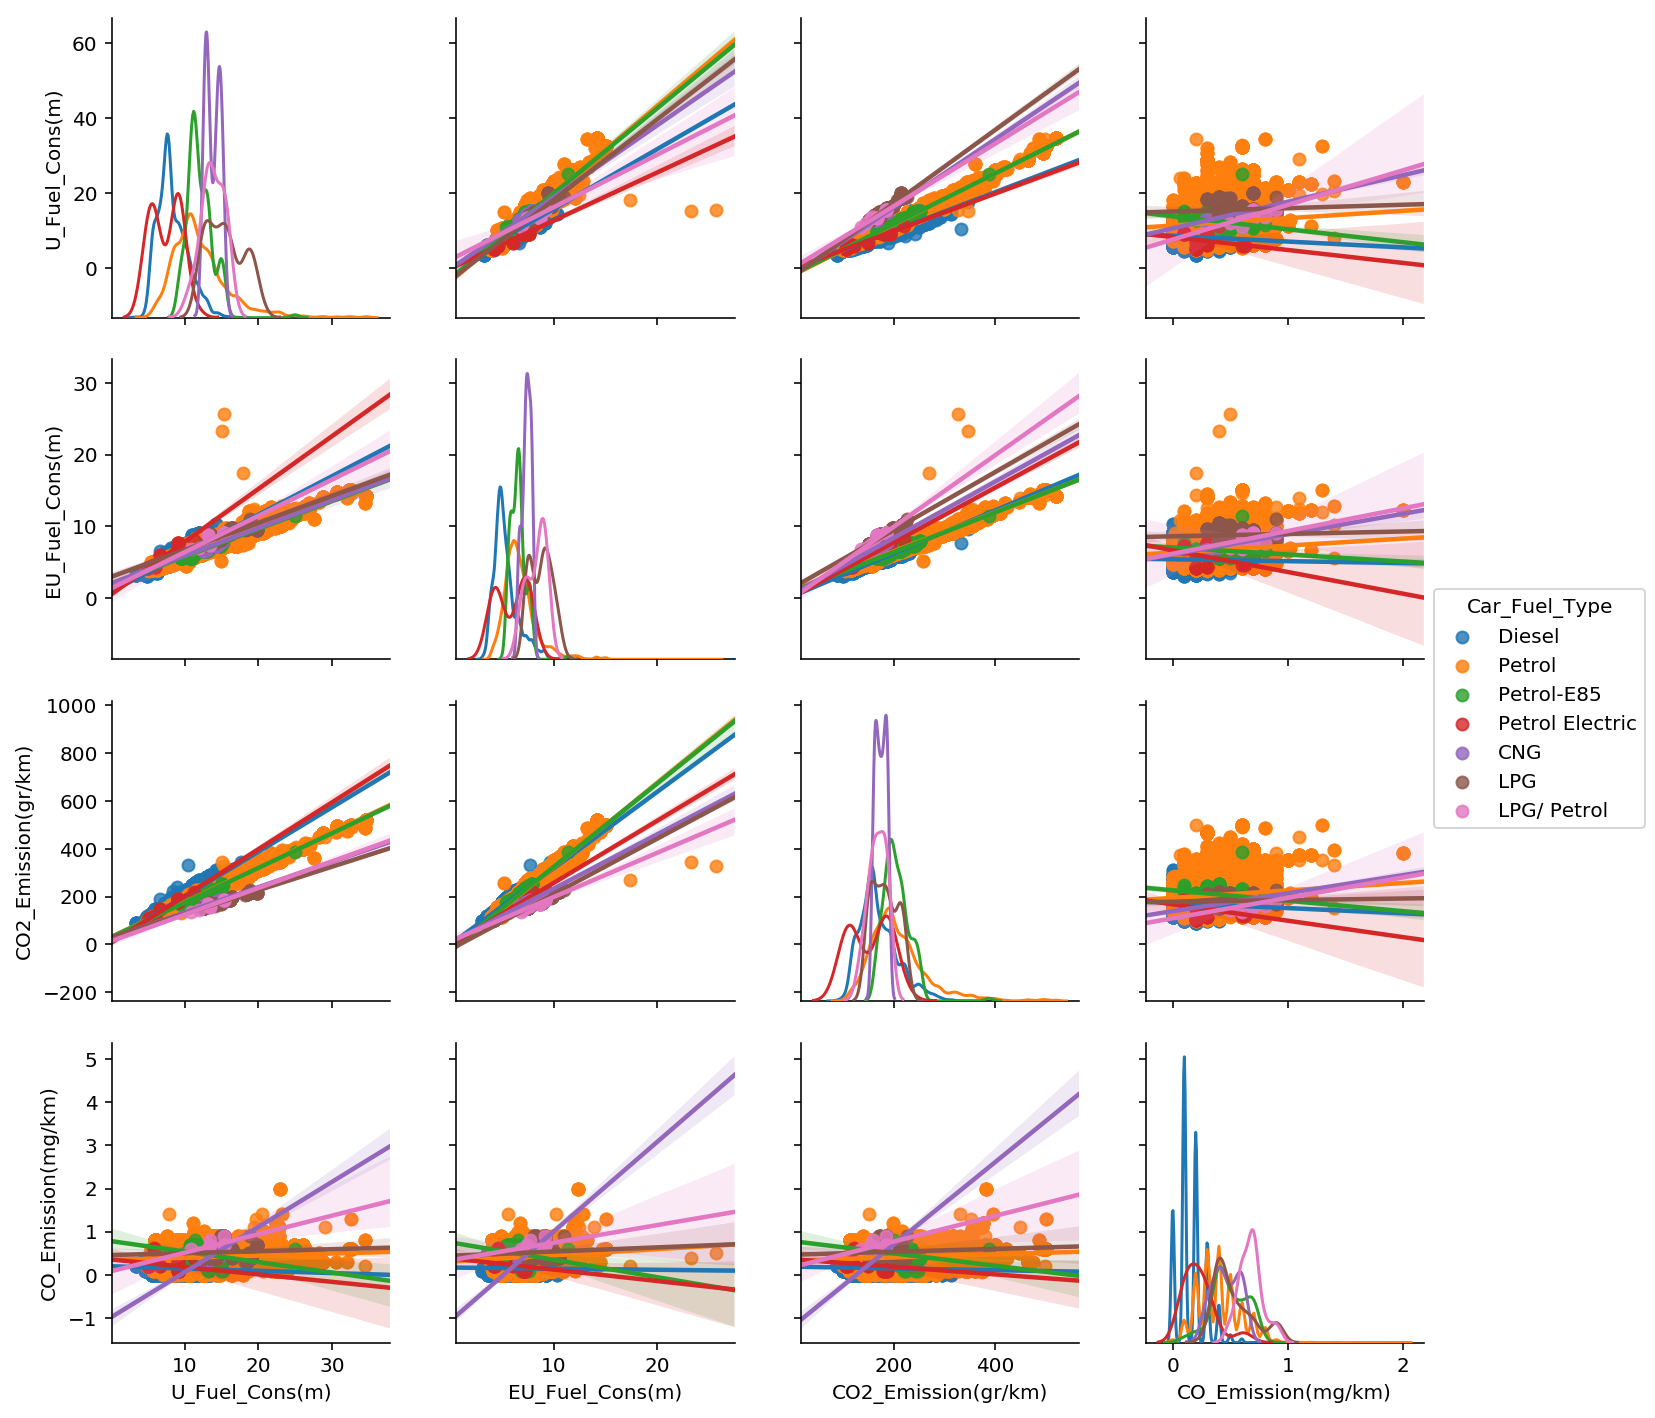

In [18]:
sns.pairplot(euro_4_data, vars=['U_Fuel_Cons(m)', 
                             'EU_Fuel_Cons(m)',
                             'CO2_Emission(gr/km)',
                             'CO_Emission(mg/km)'],
                              kind='reg',
                              diag_kind='kde',
                              hue='Car_Fuel_Type') 

We have used the _Emissions and Consumptions_ features to understand our datas via *Fuel Type*. As we can see, there is some trend between our features regardless fuel types. However, some trends has been driven by fuel type of car. We will see more detailed explanation with next section with some statistical methods.

We can see these relations according to years released.

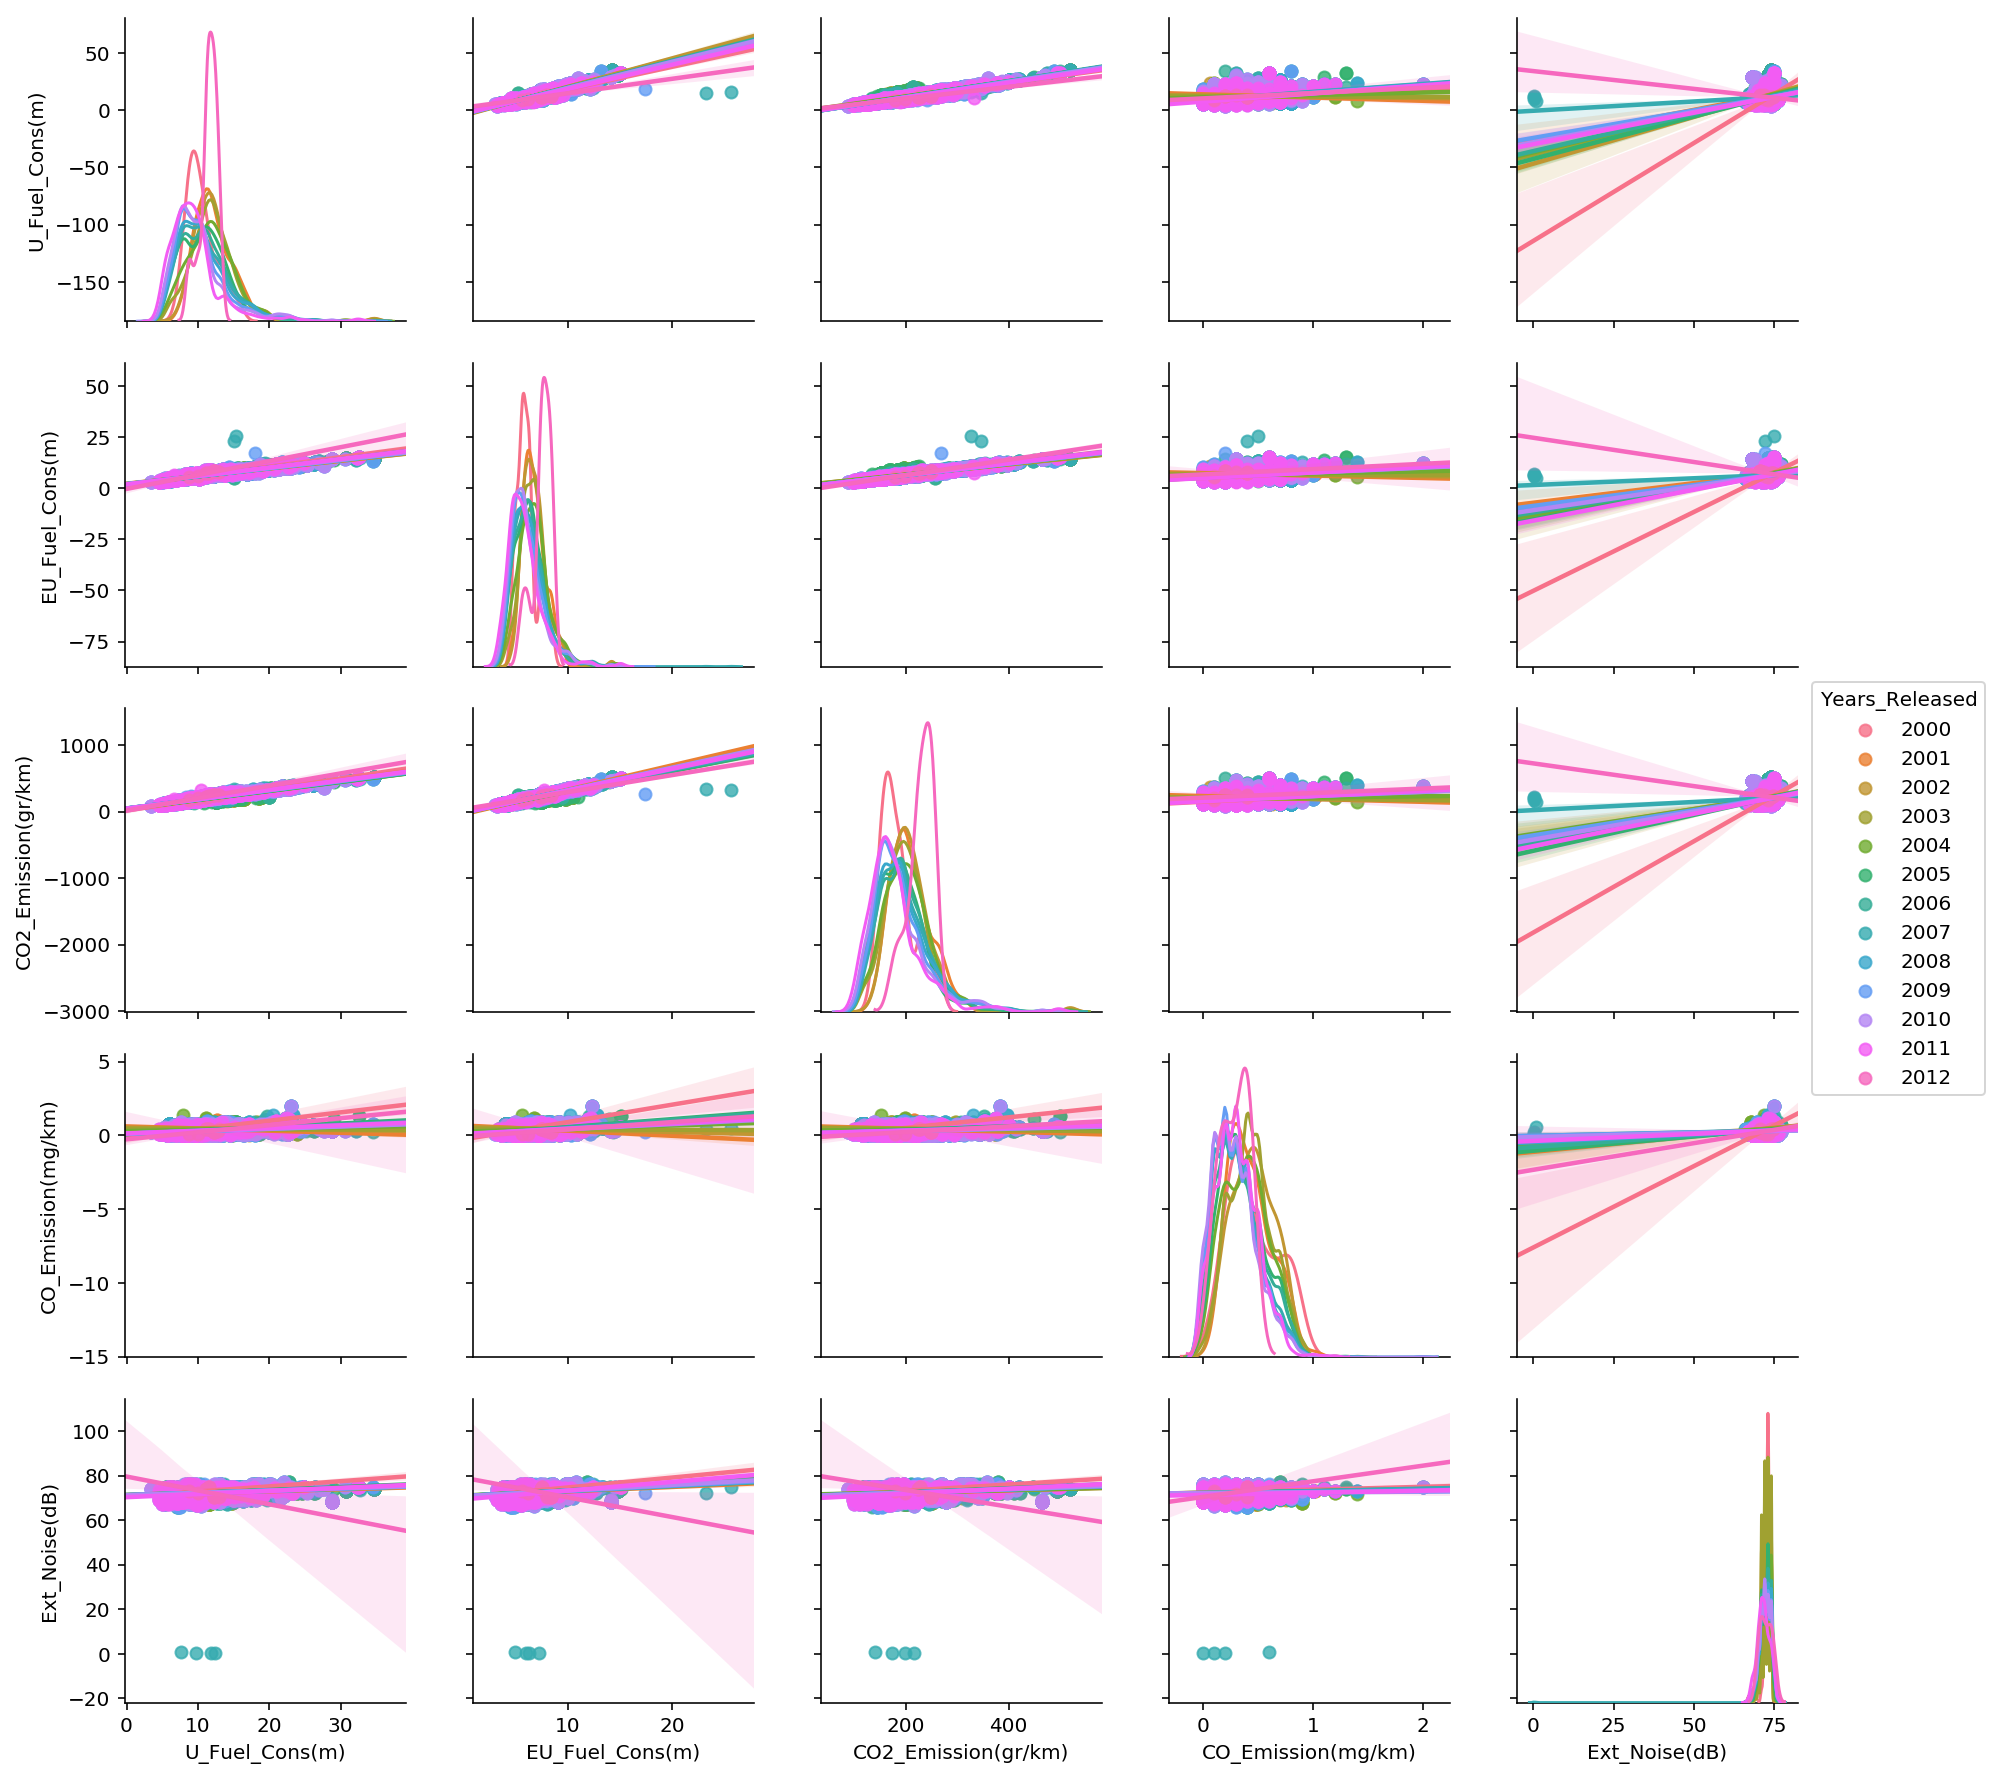

In [17]:
sns.pairplot(euro_4_data, vars=['U_Fuel_Cons(m)', 
                             'EU_Fuel_Cons(m)',
                             'CO2_Emission(gr/km)',
                             'CO_Emission(mg/km)',
                             'Ext_Noise(dB)'],
                              kind='reg',
                              diag_kind='kde',
                              hue='Years_Released') 

### As indicated, we have seen some trends abouts our data. Now, time for the hypothesis. 
We will focus to:

- Urban Fuel Consumption in metric units.
- Extra Urban Fuel Consumption in metric units.
- Combined Fuel Consumption in metric units.
- CO2 Emission (gr/km)
- CO Emission (mg/km)
- External Noise (dB)

We think there is correlation between these features. We will test it.

In [19]:
# There is some problem with our columns names, so we will change these. 

euro_4_data.rename(columns = {'U_Fuel_Cons(m)':'U_Fuel_Cons',
                              'EU_Fuel_Cons(m)':'EU_Fuel_Cons',
                              'Comb_Fuel_Cons(m)':'Comb_Fuel_Cons',
                              'Ext_Noise(dB)':'Ext_Noise',
                              'CO2_Emission(gr/km)':'CO2_Emission',
                              'CO_Emission(mg/km)':'CO_Emission'}, inplace = True)

In [20]:
# Extract the values of features.

# For consumptions features
urban_cons = euro_4_data.U_Fuel_Cons.values
extra_urban_cons = euro_4_data.EU_Fuel_Cons.values
comb_cons = euro_4_data.Comb_Fuel_Cons.values

# For noise feature
ext_noise = euro_4_data.Ext_Noise.values

# For emissions features
co_emis = euro_4_data.CO_Emission.values
co2_emis = euro_4_data.CO2_Emission.values



In [21]:
# Check shape of datas

print (urban_cons.shape)
print (extra_urban_cons.shape)
print (comb_cons.shape)

print (ext_noise.shape)

print (co_emis.shape)
print (co2_emis.shape)

(20490,)
(20490,)
(20490,)
(20490,)
(20490,)
(20490,)


We have 20490 different datapoint for all features. However, we can not use directly this numpy array with these shapes. We have to convert it to *2D Array*.

In [22]:
# Convert 1D array to 2D array

urban_cons = np.expand_dims(urban_cons, axis=1)
extra_urban_cons = np.expand_dims(extra_urban_cons, axis=1)
comb_cons = np.expand_dims(comb_cons, axis=1)

ext_noise = np.expand_dims(ext_noise, axis=1)

co_emis = np.expand_dims(co_emis, axis=1)
co2_emis = np.expand_dims(co2_emis, axis=1)

### Lets build our linear regression model. 

We will investigate relationship between:
- Combined Fuel Consumption and CO2 Emission

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


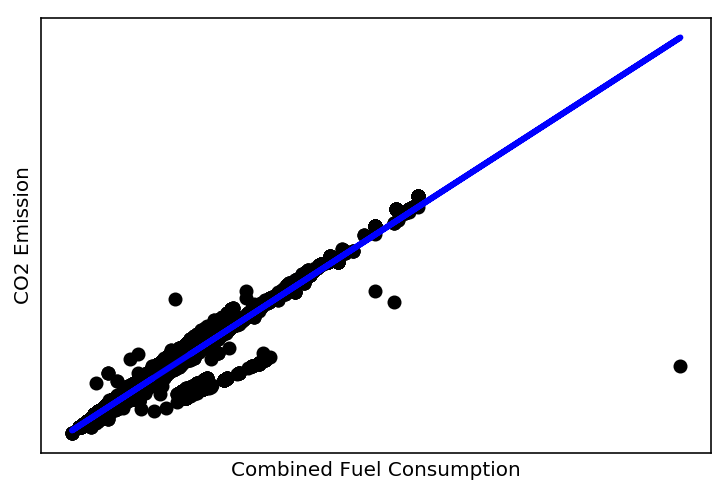

In [23]:
regr = linear_model.LinearRegression()
regr.fit(comb_cons, co2_emis) 

# plot it as in the example at http://scikit-learn.org/
plt.scatter(comb_cons, co2_emis,  color='black')
plt.plot(comb_cons, regr.predict(comb_cons), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('Combined Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.show()

We can see highly correlation without looking to statistical data. Now let's look at the statistical data.

In [24]:
model = ols("co2_emis ~ comb_cons ", euro_4_data).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               co2_emis   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 4.017e+05
Date:                Sun, 20 May 2018   Prob (F-statistic):               0.00
Time:                        23:31:22   Log-Likelihood:                -79904.
No. Observations:               20490   AIC:                         1.598e+05
Df Residuals:                   20488   BIC:                         1.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6306      0.289     68.005      0.0

R-squared is equal to 0.951, it means that there is highly correlation between CO2 emission and Combined Consumption.

Also, let's look at the relation between CO2 Emission and Noise.

In [27]:
model = ols("co2_emis ~ ext_noise ", euro_4_data).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               co2_emis   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1089.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.13e-232
Time:                        23:31:53   Log-Likelihood:            -1.1037e+05
No. Observations:               20490   AIC:                         2.207e+05
Df Residuals:                   20488   BIC:                         2.208e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.4843     13.984    -19.056      0.0

### Time for the look at the correlation and test the our hypothesis.

In [29]:
euro_4_data.head()

,Years_Released,Car_Manufacturer,Car_Model,Car_Description,Car_Transmission_Type,Car_Engine_Capacity_In_Cubic_Centimeters,Car_Fuel_Type,U_Fuel_Cons,EU_Fuel_Cons,Comb_Fuel_Cons,...,Maximum_Range_Miles,Electricity_Cost,Total_Cost,Ext_Noise,CO2_Emission,CO_Emission,THC_Emissions_In_Milligrams_Per_Km,NOx_Emissions_In_Milligrams_Per_Km,THC_And_NOx_Emissions_In_Milligrams_Per_Km,Particulate_Matter_In_Milligrams_Per_Km
0,2012,KIA,Sedona,2.2 CRDi Auto,A4,2199.0,Diesel,10.0,6.2,7.5,...,NaN,NaN,1063.6,72.0,199,0.1,NaN,0.3,0.3,0.0
1,2012,KIA,Sedona,2.2 CRDi Manual,M6,2199.0,Diesel,8.8,5.6,6.7,...,NaN,NaN,950.1,73.0,179,0.1,NaN,0.3,0.3,0.0
2,2012,SSANGYONG,Rexton II,270 CS Auto TOD 165PS 2 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,250,0.2,NaN,0.3,0.3,0.0
3,2012,SSANGYONG,Rexton II,270 CS Manual TOD 165PS 2 Seats,5MT,2696.0,Diesel,11.5,7.5,9.0,...,NaN,NaN,1276.9,74.7,228,0.4,NaN,0.3,0.3,0.0
4,2012,SSANGYONG,Rexton II,270 EX Auto TOD 165PS 7 Seats,5AT,2696.0,Diesel,12.2,8.4,9.8,...,NaN,NaN,1392.2,70.5,249,0.2,NaN,0.3,0.3,0.0


We want to focus on Urban Fuel Consumption, Extra Urban Fuel Consumption, Combined Fuel Consumtion, Noise, CO2 Emission and CO Emission. So that, extract just these columns.

In [30]:
corrdata = euro_4_data.loc[:,["U_Fuel_Cons",
                       "EU_Fuel_Cons",
                       "Ext_Noise",
                       "Comb_Fuel_Cons",
                       "CO2_Emission",
                       "CO_Emission"]]

Firstly, we will use _spearman_ method for correlation.

In [31]:
corrdata1 = corrdata.corr(method='spearman')

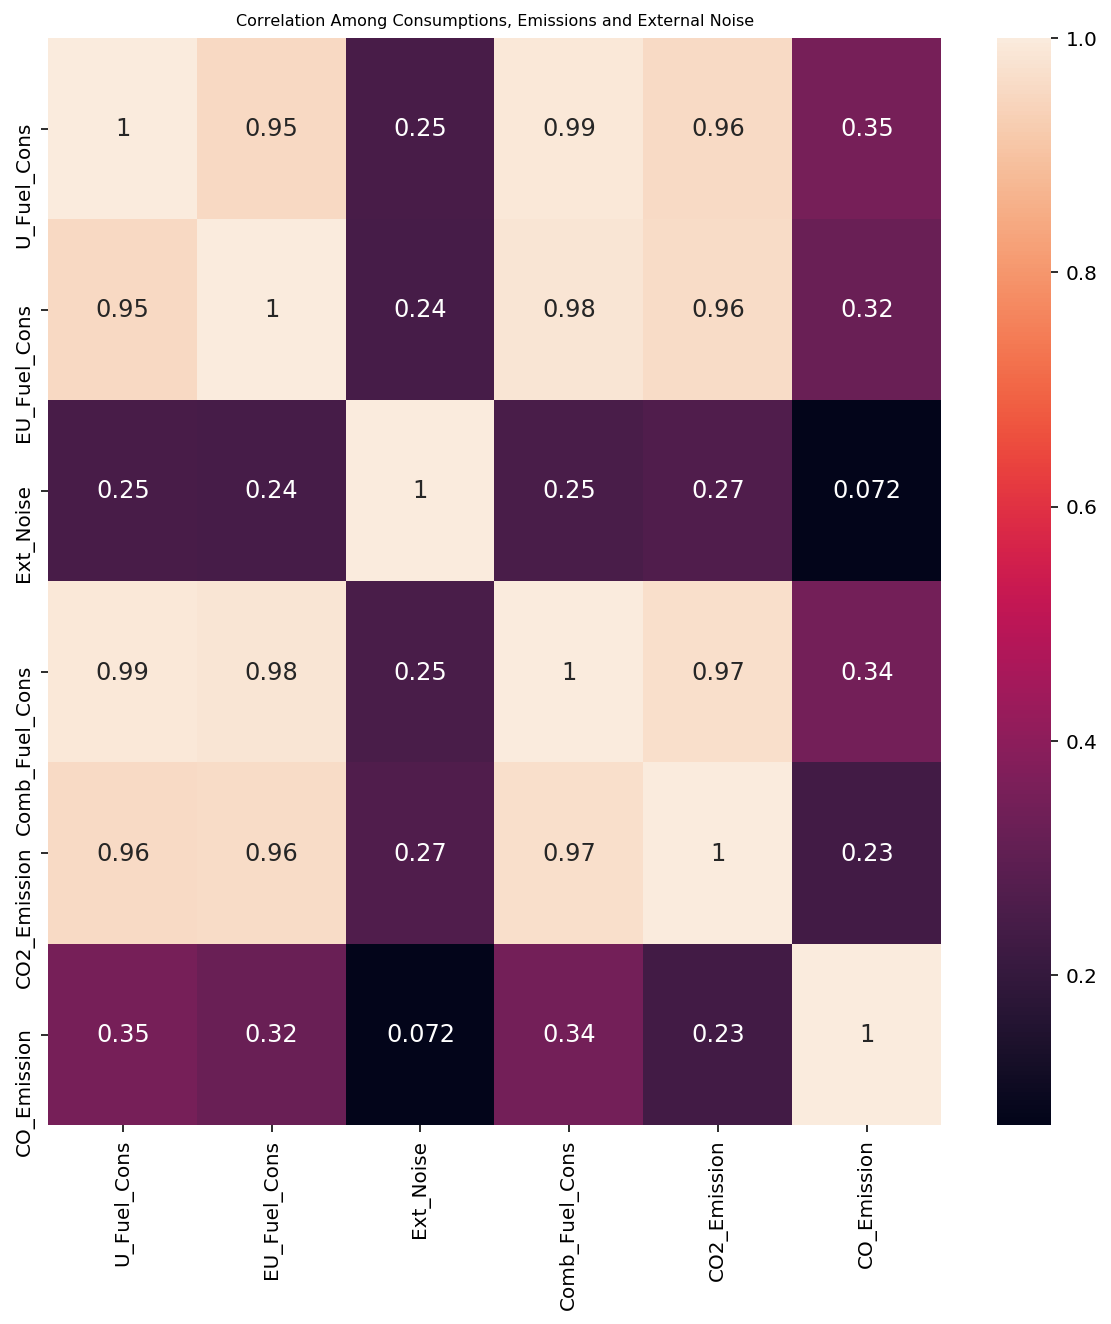

In [32]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Among Consumptions, Emissions and External Noise', size=8)
sns.heatmap(corrdata1,annot=True, annot_kws={"size":12});

We can see some highly correlated data, so we can say they are statistacally significant. We should look for the statistical data to understand other case about significancy.

In [33]:
rho, p_value = sp.spearmanr(corrdata)

In [34]:
cols = corrdata.columns
l = len(cols)
p_vals = {}
taus = {}
for c1 in range(l):   # calculate tau for all pairs of columns
    for c2 in range(c1+1):
        taus[c1,c2], p_vals[c1,c2] = sp.kendalltau(corrdata.iloc[:,c1], corrdata.iloc[:,c2])

In [35]:
for (pair,tau) in sorted(taus.items(), key=lambda x: -x[1] ):  
    if (tau<0.99) & (tau>0.5):print(cols[pair[0]],"-",cols[pair[1]], "[ Tau=", tau, "]")

Comb_Fuel_Cons - U_Fuel_Cons [ Tau= 0.9311692177283384 ]
Comb_Fuel_Cons - EU_Fuel_Cons [ Tau= 0.9104338537194907 ]
CO2_Emission - Comb_Fuel_Cons [ Tau= 0.8923545247454632 ]
CO2_Emission - EU_Fuel_Cons [ Tau= 0.8598385313202721 ]
CO2_Emission - U_Fuel_Cons [ Tau= 0.8473045208660323 ]
EU_Fuel_Cons - U_Fuel_Cons [ Tau= 0.8334551210754134 ]


In [36]:
# If there is no output, we can say that, all of them is statistically significant.

for (pair,p) in sorted(p_vals.items(), key=lambda x: -x[1] ):  
    if (p > 0.05) & (p < 0.99): print(cols[pair[0]],"-",cols[pair[1]], "[ p=", p, "]") 
        

There is no output, so that we can say that, all of them is statistically significant.

Now, let's look at the _pearson_ method for correlation.

In [37]:
corr = corrdata.corr() 

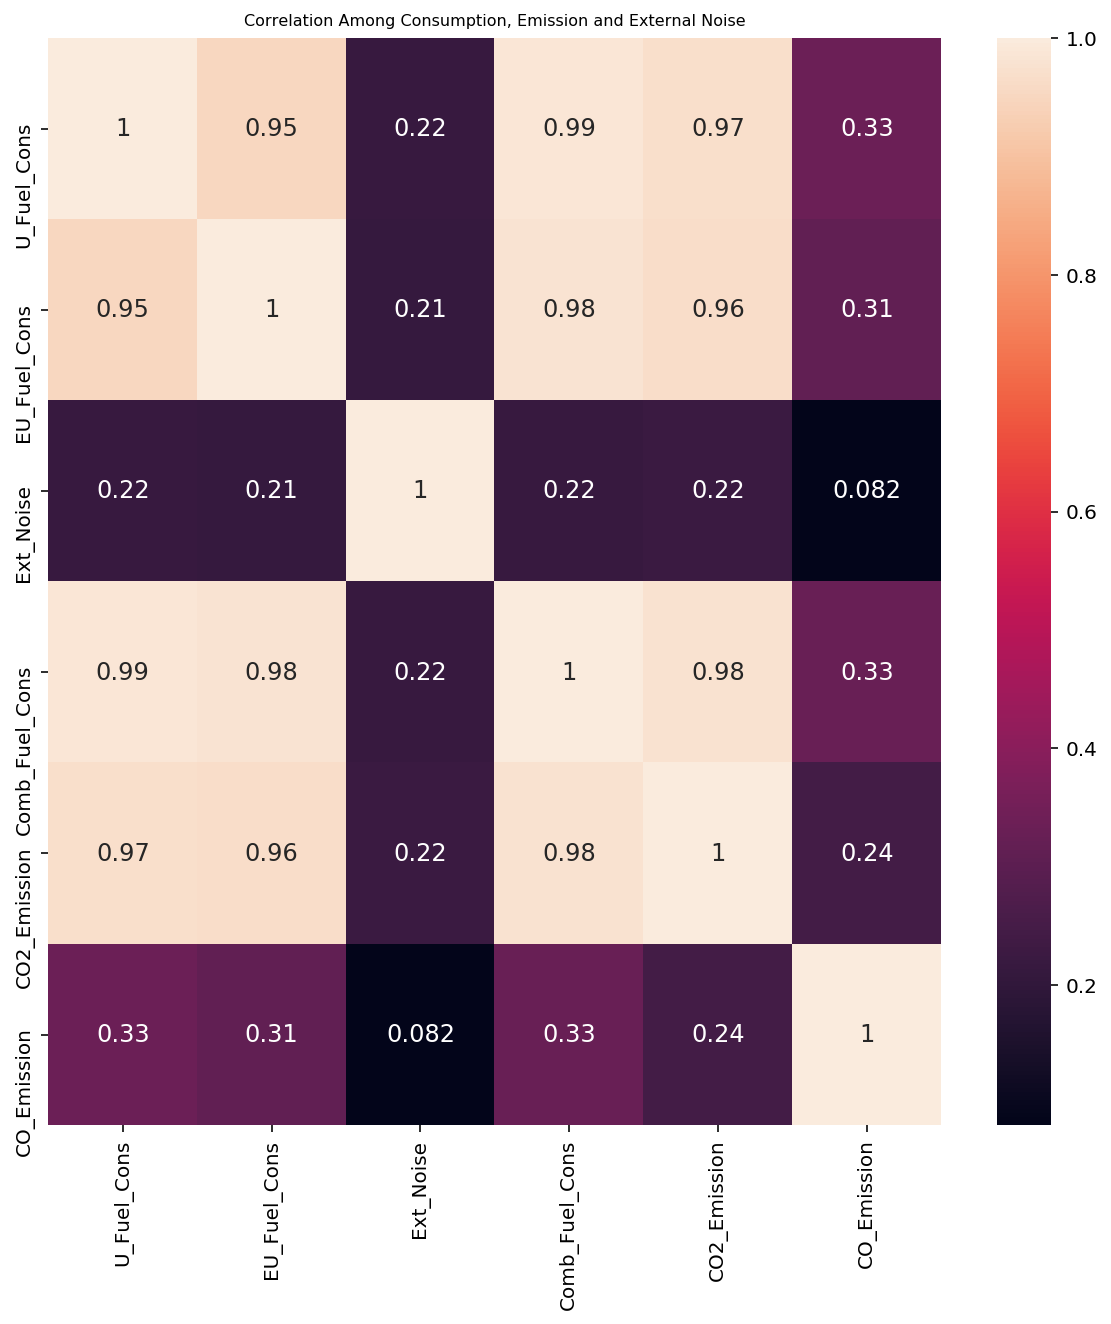

In [38]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Among Consumption, Emission and External Noise', size=8)
sns.heatmap(corr,annot=True, annot_kws={"size":12});

### Let's build our Machine Learning (ML) Model

We will build different ML models to verify our models. We will focus on the _Urban Consumption_ and _CO2 emission_ to train and test our model.

In [39]:
# Import related packages.

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

We have to split our dataset to train and test with ML models.

In [40]:
urban_cons_train, urban_cons_test ,co2_emis_train, co2_emis_test = train_test_split(urban_cons, co2_emis, 
                                                                                    test_size= 0.33, random_state=42) 

Firstly, we will build _Random Forest Regressor._ 

In [41]:
rfr = RandomForestRegressor()

Now, train Random Forest Regressor with train datas.

In [42]:
rfr.fit(urban_cons_train , co2_emis_train) 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Now, test our model with test datas to understand how it is good to predict new outputs according to input.

In [43]:
rfr.score(urban_cons_test , co2_emis_test)

0.9408221968282293

This score is very good. So that, we can say that, random forest regressor model is proper method to work with this datas.

Now, let's build _Desicion Tree Regressor._

In [44]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Initialize three different version of decision tree regressor.

In [45]:
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)

Train these regressor with train datas.

In [46]:
regr_1.fit(urban_cons_train , co2_emis_train) 
regr_2.fit(urban_cons_train , co2_emis_train) 
regr_3.fit(urban_cons_train , co2_emis_train) 

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Predict via test datas.

In [47]:
# Predict
y_1 = regr_1.predict(urban_cons_test)
y_2 = regr_2.predict(urban_cons_test)
y_3 = regr_3.predict(urban_cons_test)

Now, let's plot the results.

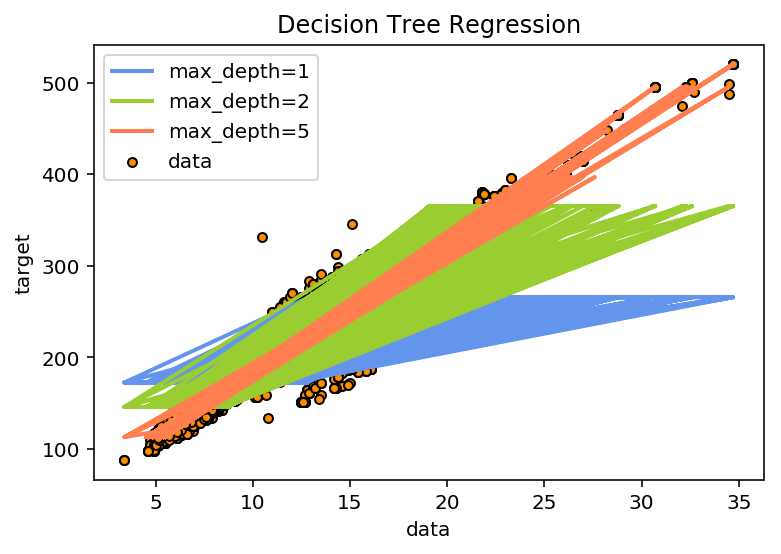

In [48]:
# Plot the results
plt.figure()
plt.scatter(urban_cons_train, co2_emis_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(urban_cons_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(urban_cons_test, y_2, color="yellowgreen", 
         label="max_depth=2", linewidth=2)
plt.plot(urban_cons_test, y_3, color="coral", 
         label="max_depth=5", linewidth=2)


plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

We can not understand easily with graphic. So, let's look at the score.

In [49]:
print(regr_1.score(urban_cons_test , co2_emis_test))

print(regr_2.score(urban_cons_test , co2_emis_test))

print(regr_3.score(urban_cons_test , co2_emis_test))

0.5336694608793668
0.815581809197107
0.9381714272084604


If we increase the maximum depth of decision tree regressor, we can get better result. Random forest regressor's score is bit better than decision tree regressor which has maximum number of depth is 5.